In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lectura de Datos:

In [73]:
data = pd.read_csv('data_HW3.csv')
data = data.rename(columns={'# x': 'x'})
array_data = data.to_numpy()
array_data

array([[ 1.        , -2.51607903],
       [ 1.001001  , -1.87210833],
       [ 1.002002  , -1.99068691],
       ...,
       [ 1.997998  , -5.07911524],
       [ 1.998999  , -3.88483076],
       [ 2.        , -5.55084387]])

## Implementación y Análisis de la función L, junto con definición en términos de X, y, theta:

In [100]:
# Implementamos la función L en función de theta, X e y:
def L(theta, X):
    y = 0
    for i in range(len(X)):
        y += (theta[0]*X[i][0] + theta[1] - X[i][1])**2
    return y*(1/2)

In [101]:
# Sacamos el gradiente de L en función de theta:
def grad_L(theta, X):
    y = np.zeros(2)
    for i in range(len(X)):
        y[0] += (theta[0]*X[i][0] + theta[1] - X[i][1])*X[i][0] # Derivada parcial de L en función de theta_0
        y[1] += (theta[0]*X[i][0] + theta[1] - X[i][1]) # Derivada parcial de L en función de theta_1
    return y

## Gradiente de theta y sus puntos críticos, mínimos y máximos:

In [105]:
# Para calcular los puntos críticos de la función L, debemos igualar a cero el gradiente de L en función de theta:
def puntos_criticos(X):
    theta = np.zeros(2)
    theta[0] = (np.mean(X[:,0])*np.mean(X[:,1]) - np.mean(X[:,0]*X[:,1]))/(np.mean(X[:,0])**2 - np.mean(X[:,0]**2))
    theta[1] = np.mean(X[:,1]) - theta[0]*np.mean(X[:,0])
    return theta
puntos_criticos(array_data)

array([-3.05416899,  1.07351838])

## Regresión Lineal con Mínimos Cuadrados:

In [121]:
# Calculamos theta con mínimos cuadrados:
def minimos_cuadrados(X):
    theta = np.zeros(2)
    theta[0] = (np.mean(X[:,0])*np.mean(X[:,1]) - np.mean(X[:,0]*X[:,1]))/(np.mean(X[:,0])**2 - np.mean(X[:,0]**2)) # Esto es igual a la derivada parcial de L en función de theta_0 igualada a cero
    theta[1] = np.mean(X[:,1]) - theta[0]*np.mean(X[:,0]) # Esto es igual a la derivada parcial de L en función de theta_1 igualada a cero
    return theta
coef_theta = minimos_cuadrados(array_data)

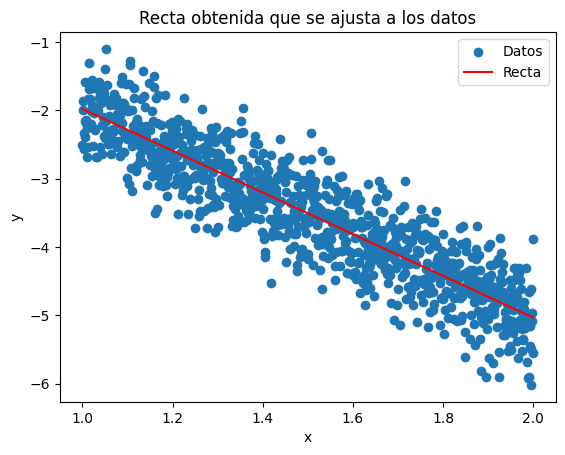

In [125]:
# Graficamos la recta que mejor se ajusta a los datos en base a mínimos cuadrados:
plt.scatter(array_data[:,0], array_data[:,1])
plt.plot(array_data[:,0], coef_theta[0]*array_data[:,0] + coef_theta[1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta obtenida que se ajusta a los datos')
plt.legend(['Datos', 'Recta'])
plt.show()

Como se logra apreciar, podemos ver que la recta que hemos obtenido es la que mejor aproxima a los datos, pudiendo así concluir que se ha realizado con éxito la regresión lineal con mínimos cuadrados.

In [127]:
# Calculamos el valor de L en los puntos de la recta obtenida:
L(coef_theta, array_data)

88.31461169034773

In [126]:
# Calculamos el error cuadrático en base a L inicial:
def L_optimizacion(X):
    y = 0
    for i in range(len(X)):
        y += (minimos_cuadrados(X)[0]*X[i][0] + minimos_cuadrados(X)[1] - X[i][1])**2
    return y/len(X)
L_optimizacion(array_data)

0.17662922338069548